## DS340-H Final Capstone Project
Jennifer Ruffin

**_Research Questions_**
1. How does station-level demand (in terms of trip origins  and destinations) vary across different months and times of day?
2. What are the resulting peak usage periods for the most popular stations?

In this notebook, I will employ the machine learning methods Random Forest Regression for predicting start counts at different stations.

In [1]:
import pandas as pd
bikeData = pd.read_csv('/Users/jenniferruffin/Desktop/Capstone/Final/CapstoneFinal.csv')  

In [2]:
bikeData['started_time'] = pd.to_datetime(bikeData['started_time'], errors='coerce')

### Strategy: Predicting Peak Usage Times with Random Forests Regressor and Gradient Boosting

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

Step 1: Aggregate hourly start counts for each station

In [11]:
hourly_starts = bikeData.groupby(['start_station_name', 'startmonth', 'start_hour', 'start_day_of_week']).size().reset_index(name='start_count')
hourly_starts = hourly_starts.rename(columns={'start_hour': 'hour','startmonth': 'month', 'start_day_of_week': 'day_of_week'})

Step 2: Defining and Encoding predictors and target variable

_Because I had categorical predictors, I decided to encode them so running the models would be easier_

In [12]:
categorical_cols = ['start_station_name', 'month', 'day_of_week']
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    hourly_starts[col + '_encoded'] = encoders[col].fit_transform(hourly_starts[col])

# Add hour as a predictor
hourly_starts['hour_of_day'] = hourly_starts['hour']

# defining predictors and target
predictors = ['start_station_name_encoded', 'month_encoded', 'day_of_week_encoded',
                   'hour_of_day'] # Add more predictors if available
target = 'start_count'

In [13]:
# Define predictors and target
X = hourly_starts[predictors]
y = hourly_starts[target]

Step 3: Split data into testing and training data

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Step 4: Run Random Forests Regression Model

In [17]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R^2:", r2_score(y_test, rf_predictions))

Random Forest Regressor:
MSE: 143.4861042721519
R^2: 0.8653183875008246


Step 4: Gradient Boosting 

In [18]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Regressor:")
print("MSE:", mean_squared_error(y_test, gb_predictions))
print("R^2:", r2_score(y_test, gb_predictions))


Gradient Boosting Regressor:
MSE: 203.063400731838
R^2: 0.8093968305233434


Step 5: Visualize Gradient Boosting Results with Feature Importance

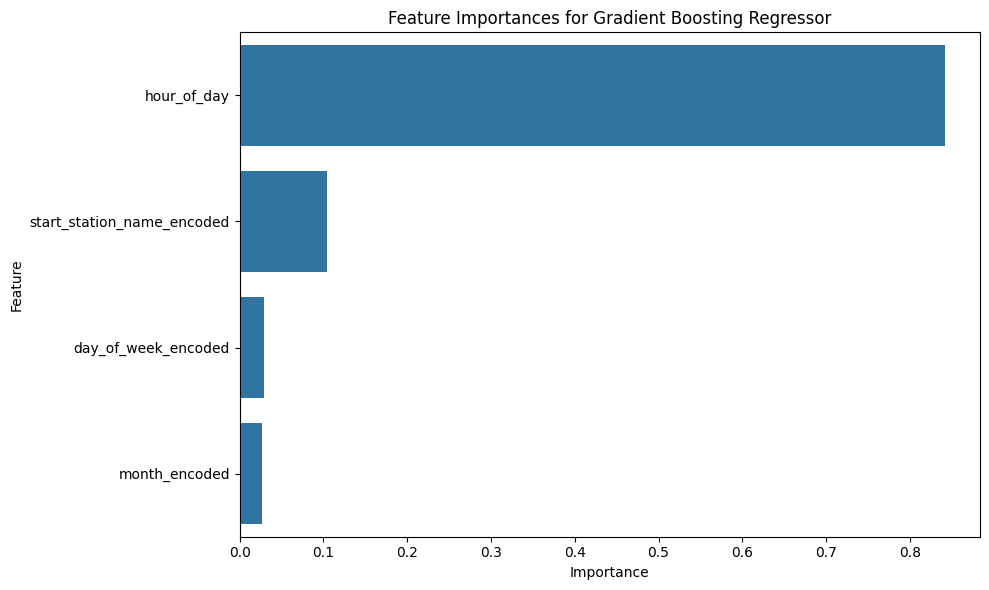

In [21]:
# import seaborn for visualizations!
import seaborn as sns

# Create a DataFrame for better sorting
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot with seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importances for Gradient Boosting Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
